<a href="https://colab.research.google.com/github/SkHaneef5626/ADM/blob/main/NLP_PROJECTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/test.csv")
display(df.head())

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics


In [3]:
df['Comment'] = df['Comment'].str.lower()
display(df.head())

,Id,Comment,Topic
0,0x1aa9,personally i have no idea what my iq is. i’ve ...,Biology
1,0x25e,i'm skeptical. a heavier lid would be needed t...,Physics
2,0x1248,i think i have 100 cm of books on the subject....,Biology
3,0x2b9,is chemistry hard in uni. ive read somewhere t...,Chemistry
4,0x24af,"in addition to the other comment, you can crit...",Physics


In [5]:
import string
def remove_punctuation(text):
    if isinstance(text, str):
        translator=str.maketrans('','',string.punctuation)
        return text.translate(translator)
df['Comment']=df['Comment'].apply(remove_punctuation)
display(df.head())

,Id,Comment,Topic
0,0x1aa9,personally i have no idea what my iq is i’ve n...,Biology
1,0x25e,im skeptical a heavier lid would be needed to ...,Physics
2,0x1248,i think i have 100 cm of books on the subject ...,Biology
3,0x2b9,is chemistry hard in uni ive read somewhere th...,Chemistry
4,0x24af,in addition to the other comment you can criti...,Physics


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)
df['Comment'] = df['Comment'].apply(remove_stopwords)
display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Comment,Topic
0,0x1aa9,personally idea iq i’ve never tested however t...,Biology
1,0x25e,im skeptical heavier lid would needed build pr...,Physics
2,0x1248,think 100 cm books subject tldr problem consci...,Biology
3,0x2b9,chemistry hard uni ive read somewhere hardest ...,Chemistry
4,0x24af,addition comment criticize theory without chec...,Physics


In [9]:
def tokenize_text(text):
    return text.split()
df['Comment'] = df['Comment'].apply(tokenize_text)
display(df.head())

,Id,Comment,Topic
0,0x1aa9,"[personally, idea, iq, i’ve, never, tested, ho...",Biology
1,0x25e,"[im, skeptical, heavier, lid, would, needed, b...",Physics
2,0x1248,"[think, 100, cm, books, subject, tldr, problem...",Biology
3,0x2b9,"[chemistry, hard, uni, ive, read, somewhere, h...",Chemistry
4,0x24af,"[addition, comment, criticize, theory, without...",Physics


In [10]:
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')

def spacy_process(text):
    doc = nlp(str(text))
    lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    pos_tags = [token.pos_ for token in doc]
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    adjs = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    return lemmas, pos_tags, verbs, adjs

df[['lemmas','pos_tags','verbs','adjectives']] = df.iloc[:,0].apply(
    lambda x: pd.Series(spacy_process(x))
)
top_verbs = Counter([v for row in df['verbs'] for v in row]).most_common(10)
top_adjs = Counter([a for row in df['adjectives'] for a in row]).most_common(10)

print("Top verbs:", top_verbs)
print("Top adjectives:", top_adjs)

Top verbs: [('0x1ce', 1), ('0xe12', 1), ('0xac4', 1), ('0x3e', 1), ('0x2161', 1), ('0x1375', 1), ('0x19d', 1), ('0x1cce', 1), ('0x231d', 1), ('0x56b', 1)]
Top adjectives: [('0x274d', 1), ('0x8b', 1), ('0x108c', 1), ('0x221a', 1), ('0x45', 1), ('0x29', 1), ('0x22c1', 1), ('0x275e', 1), ('0x196d', 1), ('0x22c5', 1)]


In [11]:
import re

def remove_pii(text):
    text = re.sub(r'\b\d{10}\b', '[PHONE]', str(text))
    text = re.sub(r'\S+@\S+\.\S+', '[EMAIL]', text)
    text = re.sub(r'http\S+|www\.\S+', '[URL]', text)
    return text

df['no_pii'] = df.iloc[:,0].apply(remove_pii)
df[['no_pii']].head(3)

,no_pii
0,0x1aa9
1,0x25e
2,0x1248


Average essay length: 1.0
Top words: []
Top bigrams: []


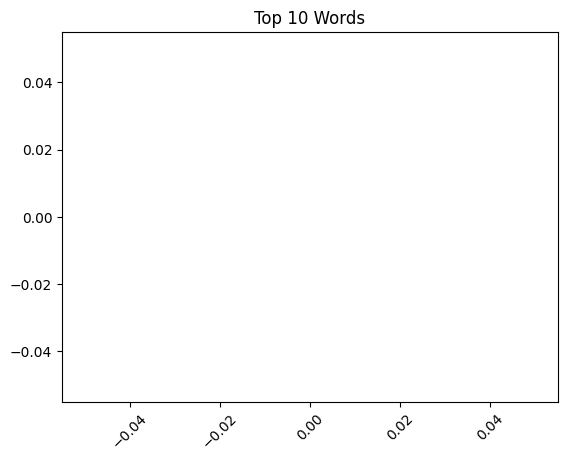

In [12]:
from nltk.util import bigrams
import matplotlib.pyplot as plt
df['word_count'] = df.iloc[:,0].apply(lambda x: len(str(x).split()))
print("Average essay length:", df['word_count'].mean())

all_words = [w for row in df['lemmas'] for w in row]
top_words = Counter(all_words).most_common(10)
print("Top words:", top_words)

all_bigrams = list(bigrams(all_words))
top_bigrams = Counter(all_bigrams).most_common(10)
print("Top bigrams:", top_bigrams)

plt.bar([w for w,_ in top_words],[c for _,c in top_words])
plt.title("Top 10 Words")
plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['text_str'] = df['Comment'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_str'])
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (1586, 5000)


In [16]:
from sklearn.model_selection import train_test_split
X = tfidf_matrix
y = df['Topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1268, 5000)
Shape of X_test: (318, 5000)
Shape of y_train: (1268,)
Shape of y_test: (318,)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_rf = forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Model Statistical:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Model Statistical:
Accuracy: 0.7264
Precision: 0.7515
Recall: 0.7264
F1-Score: 0.7210


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D,GlobalAveragePooling1D, LSTM, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

mlp = Sequential([Dense(128, activation='relu', input_shape=(X_train.shape[1],)),Dropout(0.5),Dense(64, activation='relu'),Dense(32, activation='relu'), Dense(y_train_one_hot.shape[1], activation='softmax')])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train.toarray(), y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test.toarray(), y_test_one_hot))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3595 - loss: 1.0962 - val_accuracy: 0.5126 - val_loss: 1.0839
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5646 - loss: 1.0594 - val_accuracy: 0.6069 - val_loss: 1.0190
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7300 - loss: 0.9113 - val_accuracy: 0.7547 - val_loss: 0.8017
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9338 - loss: 0.5136 - val_accuracy: 0.7799 - val_loss: 0.5497
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9738 - loss: 0.1560 - val_accuracy: 0.7799 - val_loss: 0.5363


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text_str'])
sequences = tokenizer.texts_to_sequences(df['text_str'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Split data into training and testing sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


# Encode target variable
label_encoder = LabelEncoder()
y_train_cnn_encoded = label_encoder.fit_transform(y_train_cnn)
y_test_cnn_encoded = label_encoder.transform(y_test_cnn)

# One-hot encode the target variable
y_train_cnn_one_hot = to_categorical(y_train_cnn_encoded)
y_test_cnn_one_hot = to_categorical(y_test_cnn_encoded)


vocab_size = 5000
cnn = Sequential([Embedding(vocab_size, 128, input_length=max_sequence_length),
Conv1D(128, 5, activation="relu"),GlobalMaxPooling1D(),Dropout(0.3),Dense(64,
activation='relu'),Dense(y_train_cnn_one_hot.shape[1], activation='softmax')])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn_one_hot, epochs=5, batch_size=64, validation_data=
(X_test_cnn, y_test_cnn_one_hot))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.3697 - loss: 1.0957 - val_accuracy: 0.4182 - val_loss: 1.0827
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - accuracy: 0.4185 - loss: 1.0390 - val_accuracy: 0.4340 - val_loss: 1.0520
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step - accuracy: 0.7261 - loss: 0.9151 - val_accuracy: 0.6069 - val_loss: 0.9328
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.9396 - loss: 0.6149 - val_accuracy: 0.7830 - val_loss: 0.6523
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 400ms/step - accuracy: 0.9958 - loss: 0.1874 - val_accuracy: 0.7736 - val_loss: 0.5320


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

loss_cnn, accuracy_cnn = cnn.evaluate(X_test_cnn, y_test_cnn_one_hot, verbose=0)
y_pred_cnn_proba = cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_proba, axis=1)
y_test_cnn_labels = np.argmax(y_test_cnn_one_hot, axis=1)

precision_cnn = precision_score(y_test_cnn_labels, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test_cnn_labels, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test_cnn_labels, y_pred_cnn, average='weighted')

print(f"CNN Model Statistical:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1-Score: {f1_cnn:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
CNN Model Statistical:
Accuracy: 0.7736
Precision: 0.7807
Recall: 0.7736
F1-Score: 0.7735


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Logistic Regression metrics
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Calculate MLP metrics
loss_mlp, accuracy_mlp = mlp.evaluate(X_test.toarray(), y_test_one_hot, verbose=0)
y_pred_mlp_proba = mlp.predict(X_test.toarray())
y_pred_mlp = np.argmax(y_pred_mlp_proba, axis=1)
y_test_mlp_labels = np.argmax(y_test_one_hot, axis=1)

precision_mlp = precision_score(y_test_mlp_labels, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test_mlp_labels, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test_mlp_labels, y_pred_mlp, average='weighted')


performance_data = {
'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
'MLP': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp],
'CNN': [accuracy_cnn, precision_cnn, recall_cnn, f1_cnn]
}
performance_df = pd.DataFrame(performance_data)
display(performance_df)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


,Metric,Logistic Regression,Random Forest,MLP,CNN
0,Accuracy,0.770440,0.726415,0.779874,0.773585
1,Precision,0.777596,0.751534,0.787043,0.780713
2,Recall,0.770440,0.726415,0.779874,0.773585
3,F1-Score,0.768554,0.721047,0.782040,0.773494


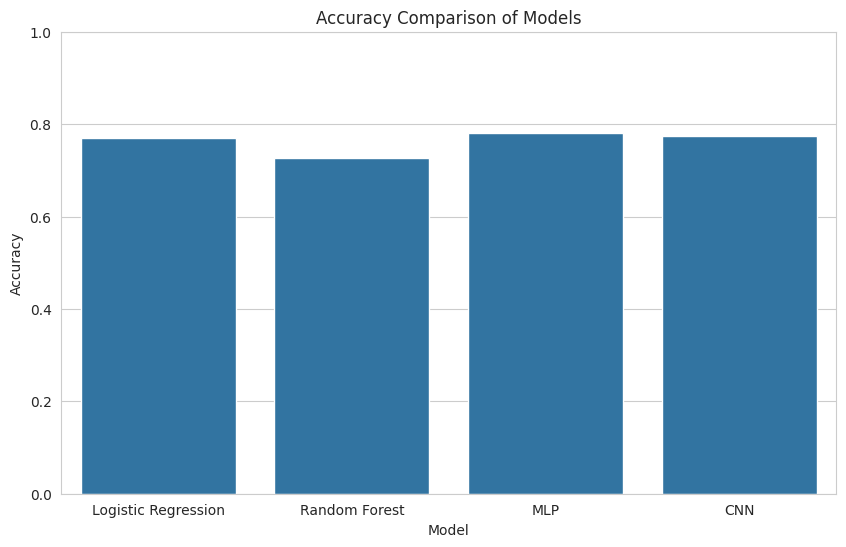

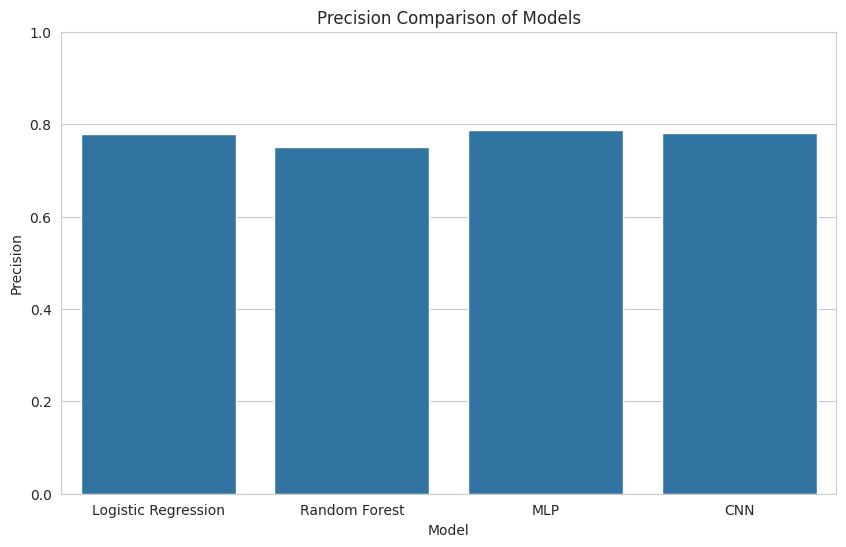

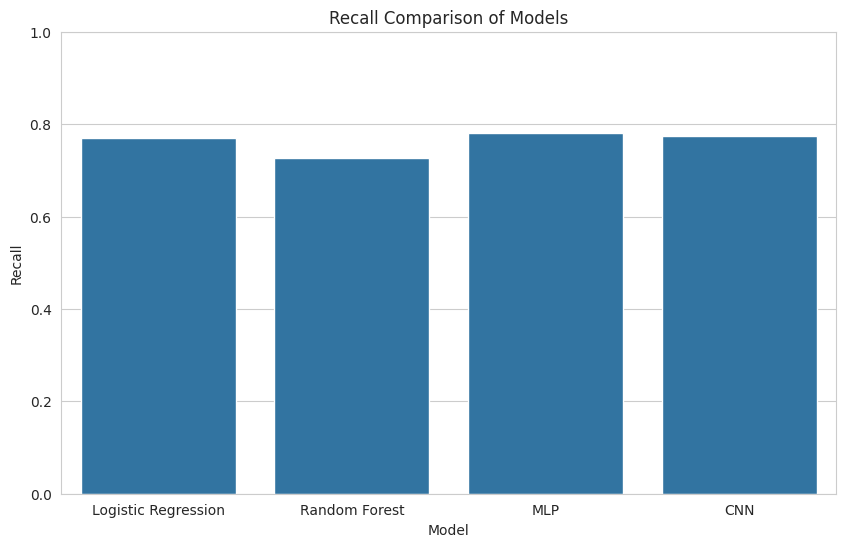

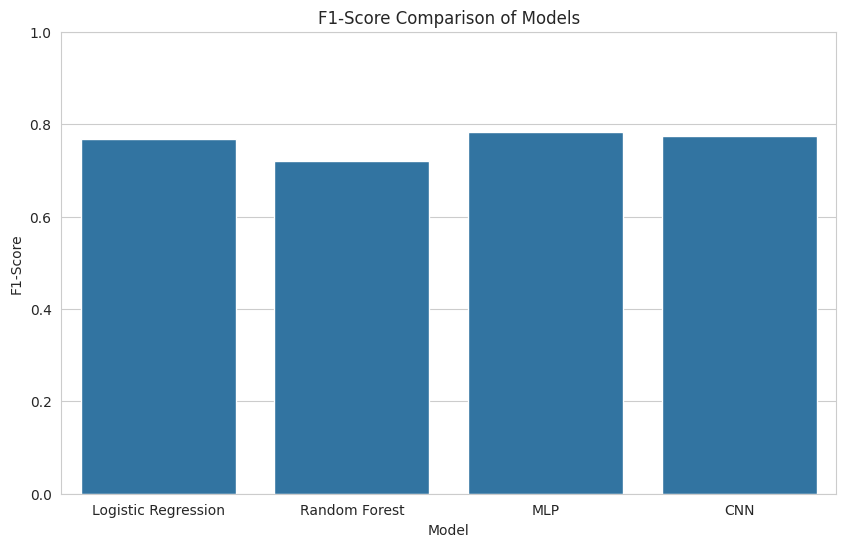

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
performance_melted = performance_df.melt(
    id_vars='Metric',
    var_name='Model',
    value_name='Score'
)
metrics = performance_melted['Metric'].unique()
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Model',
        y='Score',
        data=performance_melted[performance_melted['Metric'] == metric]
    )
    plt.title(f'{metric} Comparison of Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()